In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np
import os
import joblib

In [60]:
df =  pd.read_csv('dataset_completo_con_ratios.csv')
df.groupby(df['category_id']).count()
#df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,lat,lon,geometry,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio
category_id,,,,,,,,,,,,,,,,,,,,,
1,2577,2577,2577,2577,2577,2577,2577,2577,2577,2577,...,2577,2577,2577,2577,2577,2577,2577,2577,2577,2577
2,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
10,13754,13754,13754,13754,13754,13754,13754,13754,13754,13754,...,13754,13754,13754,13754,13754,13754,13754,13754,13754,13754
15,534,534,534,534,534,534,534,534,534,534,...,534,534,534,534,534,534,534,534,534,534
17,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,...,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
19,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
20,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,...,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788
22,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926,...,2926,2926,2926,2926,2926,2926,2926,2926,2926,2926
23,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828,...,1828,1828,1828,1828,1828,1828,1828,1828,1828,1828


In [4]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_weekday'] = df['publish_time'].dt.dayofweek  # 0 = lunes, 6 = domingo
df['publish_month'] = df['publish_time'].dt.month
#df['publish_weekday'] = df['publish_time'].dt.day_name()
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio,publish_hour,publish_weekday,publish_month
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 07:38:29+00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506,7,4,11
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 06:24:44+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546,6,6,11
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042,17,4,11
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 02:30:38+00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,Sports,0.941463,242.000,Base,752.243243,12.00,16.083333,2,0,11
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 01:45:13+00:00,[none],9815.000,30.000,2.00,...,News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000,1,0,11


In [5]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'state', 'lat', 'lon',
       'geometry', 'category_title', 'like_ratio', 'total_interactions',
       'trending_clasify', 'views_per_comment', 'dislikes_adj',
       'like_dislike_ratio', 'publish_hour', 'publish_weekday',
       'publish_month'],
      dtype='object')

In [53]:
# Diccionario de ejemplo para mapear category_id a nombres (ajusta según tu dataset)
category_map = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    20: 'Gaming',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    # Agrega más según tu dataset
}

df['category_name'] = df['category_id'].map(category_map).fillna(df['category_id'])

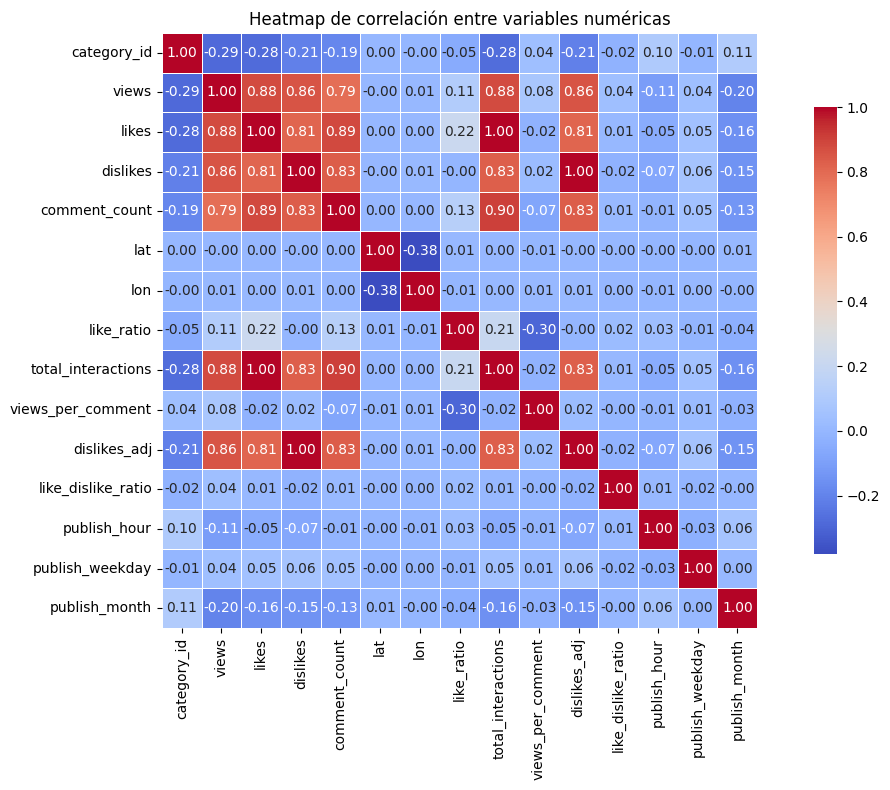

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas (correlación solo aplica a valores numéricos)
numericas = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numericas.corr()

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Heatmap de correlación entre variables numéricas')
plt.tight_layout()
plt.show()


In [37]:
X = df[[
    'publish_hour', 'publish_weekday','total_interactions', 'category_id'
]]
y = df['views']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)#distribucion de rango 

In [39]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = rfr.predict(X_test)

In [41]:
y_pred

array([7805937.6 ,  235337.36,  367782.63, ..., 2188446.43,   91918.8 ,
       1149732.86])

In [42]:
mean_absolute_error(y_pred, y_test)

348079.91718711704

In [44]:
mean_squared_error(y_pred, y_test)

704522769287.0573

In [43]:
r2_score(y_pred, y_test)

0.921847305224916

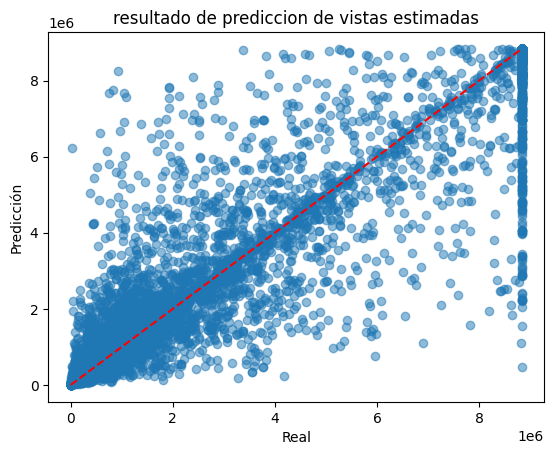

In [35]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("resultado de prediccion de vistas estimadas")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



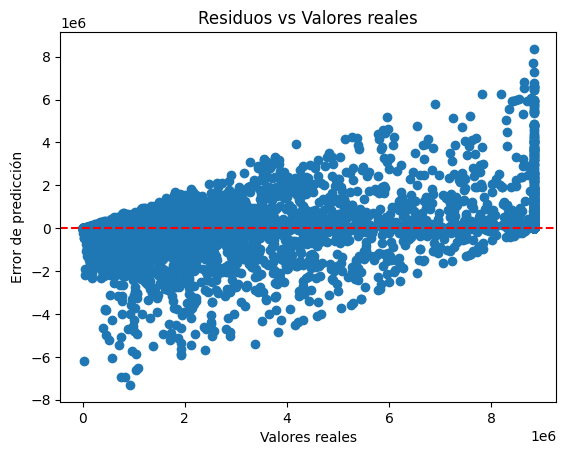

In [36]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs Valores reales")
plt.xlabel("Valores reales")
plt.ylabel("Error de predicción")
plt.show()


In [66]:
res = rfr.predict(X_test)
print(res)

[7805937.6   235337.36  367782.63 ... 2188446.43   91918.8  1149732.86]


In [64]:
X_test

,publish_hour,publish_weekday,total_interactions,category_id
18543,12,3,230380.000,10
36251,13,4,11150.000,22
5426,13,4,9809.000,24
21687,15,2,306556.625,10
25331,13,0,69559.000,10
...,...,...,...,...
35708,16,1,306556.625,10
10075,5,4,306556.625,22
33765,4,4,88090.000,10
34181,15,5,4260.000,20


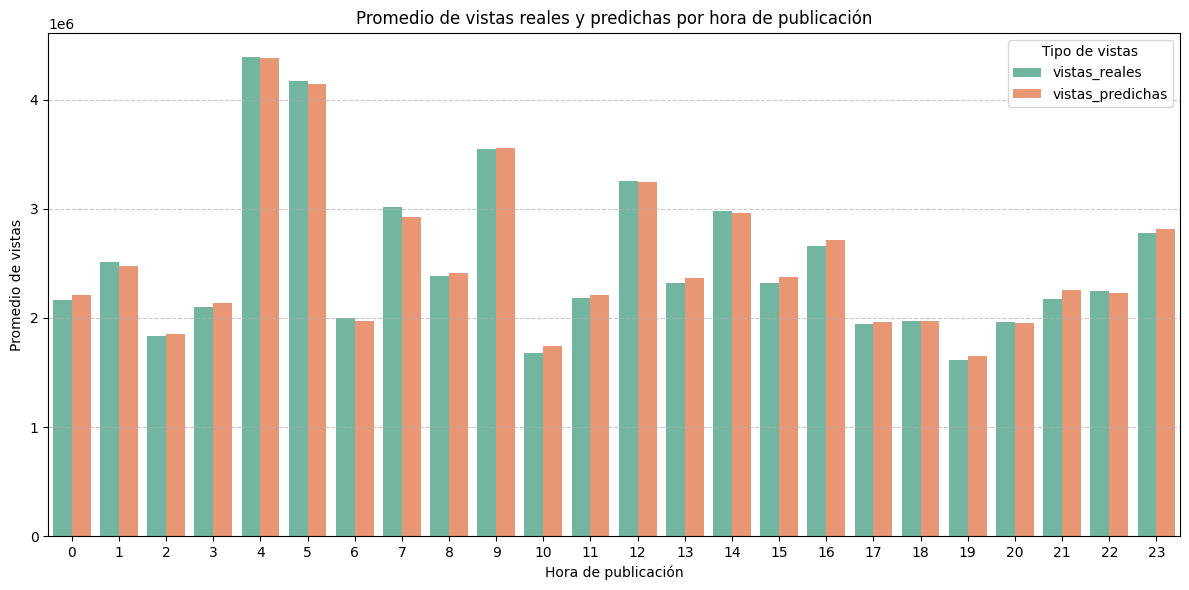

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparamos el DataFrame
df_plot = X_test[['publish_hour']].copy()
df_plot['vistas_reales'] = y_test
df_plot['vistas_predichas'] = y_pred

# Agrupamos por hora de publicación
df_avg = df_plot.groupby('publish_hour').agg({
    'vistas_reales': 'mean',
    'vistas_predichas': 'mean'
}).reset_index()

# Convertimos a formato largo para usar hue en seaborn
df_avg_long = df_avg.melt(id_vars='publish_hour', 
                          value_vars=['vistas_reales', 'vistas_predichas'], 
                          var_name='tipo', 
                          value_name='promedio_vistas')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(data=df_avg_long, x='publish_hour', y='promedio_vistas', hue='tipo', palette='Set2')

plt.title('Promedio de vistas reales y predichas por hora de publicación')
plt.xlabel('Hora de publicación')
plt.ylabel('Promedio de vistas')
plt.xticks(range(0, 24))  # Asegura que se muestren todas las horas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de vistas')
plt.tight_layout()
plt.show()
